## Group No 8

## Group Member Names:

1. Rekha N - 2022dc04058
2. Prabhakaran J - 2022dc04186
3. Sujitha J - 2022dc04059


## Paper Selected:
The paper selecte dy our group is "Robotic Path Planning Using Recurrent Neural Networks"
Our goal is to use RNN approach with Dijksta, A* and LSTM algorithm for Trajectory planning by Robots.
Below is the implementation for the same.

# Importing libraries

In [ ]:
import heapq  # For priority queue
import random
import matplotlib.pyplot as plt

## Dijkstra's Algorithm:
Sample grid for robot path planning has been generated in the code, which is provided as input for the algowithms' used in the following. Let us compare the results of how a path is efficiently identified by our robot overcoming the obstacles and reaching the path efficiently. 

Generated Environment Grid:
Grid Layout:
. . . . .
. # . # .
# . . . .
. . # # #
. . # . #

Explored States:
(0, 1)
(0, 0)
(0, 2)
(0, 3)
(1, 0)
(1, 2)
(0, 4)
(2, 2)
(1, 4)
(2, 1)
(2, 3)

Optimal Path Found:
(0, 1)
(0, 2)
(1, 2)
(2, 2)
(2, 3)

Distance is 4


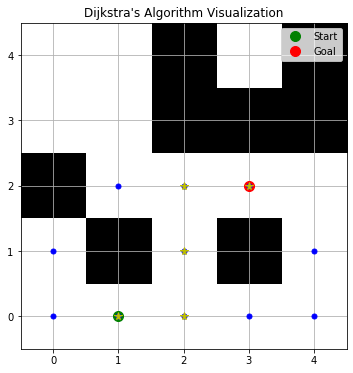

In [72]:
#Dijkstra Path Finding Implementation
class Dijkstra:
    def __init__(self, start, goal, clearance, radius, grid):
        self.start = start
        self.goal = goal
        self.clearance = clearance
        self.radius = radius
        self.grid = grid

    def IsValid(self, x, y):
        return 0 <= x < len(self.grid) and 0 <= y < len(self.grid[0])

    def IsObstacle(self, x, y):
        return self.grid[x][y] == 1  # Assuming 1 represents an obstacle

    def Dijkstra(self):
        explored_states = []
        backtrack_states = []
        distance_from_start_to_goal = float('inf')

        pq = [(0, self.start)]  # (cost, (x, y))
        distances = {self.start: 0}
        came_from = {self.start: None}

        while pq:
            current_distance, current_node = heapq.heappop(pq)
            explored_states.append(current_node)

            if current_node == self.goal:
                distance_from_start_to_goal = current_distance
                break

            for neighbor in self.get_neighbors(current_node):
                if self.IsValid(*neighbor) and not self.IsObstacle(*neighbor):
                    new_distance = current_distance + 1  # Uniform cost

                    if neighbor not in distances or new_distance < distances[neighbor]:
                        distances[neighbor] = new_distance
                        came_from[neighbor] = current_node
                        heapq.heappush(pq, (new_distance, neighbor))

        # Backtrack to find the path
        if distance_from_start_to_goal != float('inf'):
            current = self.goal
            while current is not None:
                backtrack_states.append(current)
                current = came_from[current]
            backtrack_states.reverse()

        return explored_states, backtrack_states, distance_from_start_to_goal

    def get_neighbors(self, node):
        x, y = node
        neighbors = []
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
            neighbor = (x + dx, y + dy)
            neighbors.append(neighbor)
        return neighbors

def generate_grid(size, obstacle_count):
    grid = [[0 for _ in range(size)] for _ in range(size)]  # Create a size x size grid
    placed_obstacles = 0

    while placed_obstacles < obstacle_count:
        x = random.randint(0, size - 1)
        y = random.randint(0, size - 1)
        if grid[x][y] == 0:  # Only place an obstacle if the cell is free
            grid[x][y] = 1
            placed_obstacles += 1

    return grid

def print_grid(grid):
    print("Grid Layout:")
    for row in grid:
        print(" ".join(['#' if cell == 1 else '.' for cell in row]))
    print()

def run_dijkstra(size, counter):
    grid = generate_grid(size, counter)
    
    # Randomly select start and goal positions that are not obstacles
    start, goal = None, None
    while start is None or grid[start[0]][start[1]] == 1:
        start = (random.randint(0, size - 1), random.randint(0, size - 1))
    while goal is None or grid[goal[0]][goal[1]] == 1 or goal == start:
        goal = (random.randint(0, size - 1), random.randint(0, size - 1))
    
    dijkstra = Dijkstra(start, goal, clearance=0, radius=0, grid=grid)
    explored_states, backtrack_states, distance_from_start_to_goal = dijkstra.Dijkstra()
    
    # Print the grid to show obstacles
    print("Generated Environment Grid:")
    print_grid(grid)
    
    return grid, start, goal, explored_states, backtrack_states, distance_from_start_to_goal

def plot_grid(grid, start, goal, explored_states, backtrack_states):
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='gray_r')  # 0 = free, 1 = obstacle

    # Mark start and goal
    plt.plot(start[1], start[0], "go", markersize=10, label="Start")  # Start in green
    plt.plot(goal[1], goal[0], "ro", markersize=10, label="Goal")      # Goal in red

    # Mark explored states
    for state in explored_states:
        plt.plot(state[1], state[0], "bo", markersize=5)  # Explored in blue

    # Mark path
    if backtrack_states:
        for state in backtrack_states:
            plt.plot(state[1], state[0], "y*", markersize=8)  # Path in yellow

    plt.title("Dijkstra's Algorithm Visualization")
    plt.xlim(-0.5, len(grid) - 0.5)
    plt.ylim(len(grid) - 0.5, -0.5)
    plt.gca().set_xticks(range(len(grid)))
    plt.gca().set_yticks(range(len(grid)))
    plt.gca().invert_yaxis()  # Invert y-axis to match grid coordinates
    plt.grid(True)
    plt.legend()
    plt.show()

# Set environment size and counter for obstacles
env_size = 5
obstacle_count = 8  # Change this to whatever count you need

# Run the Dijkstra algorithm
grid, start, goal, explored_states, backtrack_states, distance = run_dijkstra(env_size, obstacle_count)

# Print explored states
print("Explored States:")
for state in explored_states:
    print(state)

# Print optimal path found
print("\nOptimal Path Found:")
for state in backtrack_states:
    print(state)

# Print distance
print(f"\nDistance is {distance}" if distance != float('inf') else "\nNo optimal path found.")

# Plot the results
plot_grid(grid, start, goal, explored_states, backtrack_states)


# A* algorithm

The same implementation is carried out for the A* algorithm. The grid in the output diplays the path traversed. The black boxes are obstacles that are in front of the system path.

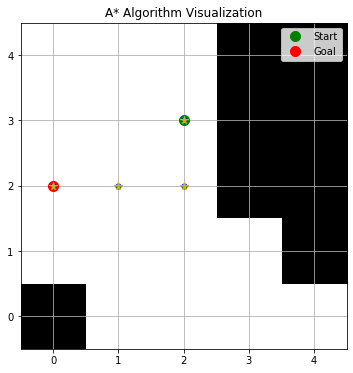

In [33]:
#A Star Path Finding Implementation
class AStar:
    def __init__(self, start, goal, grid):
        self.start = start
        self.goal = goal
        self.grid = grid

    def IsValid(self, x, y):
        return 0 <= x < len(self.grid) and 0 <= y < len(self.grid[0])

    def IsObstacle(self, x, y):
        return self.grid[x][y] == 1  # Assuming 1 represents an obstacle

    def heuristic(self, node):
        # Using Manhattan distance as the heuristic
        return abs(node[0] - self.goal[0]) + abs(node[1] - self.goal[1])

    def AStar(self):
        explored_states = []
        backtrack_states = []
        distance_from_start_to_goal = float('inf')

        pq = [(0, self.start)]  # (cost, (x, y))
        g_costs = {self.start: 0}
        f_costs = {self.start: self.heuristic(self.start)}
        came_from = {self.start: None}

        while pq:
            current_cost, current_node = heapq.heappop(pq)
            explored_states.append(current_node)

            if current_node == self.goal:
                distance_from_start_to_goal = g_costs[current_node]
                break

            for neighbor in self.get_neighbors(current_node):
                if self.IsValid(*neighbor) and not self.IsObstacle(*neighbor):
                    tentative_g_cost = g_costs[current_node] + 1  # Uniform cost

                    if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                        g_costs[neighbor] = tentative_g_cost
                        f_costs[neighbor] = tentative_g_cost + self.heuristic(neighbor)
                        came_from[neighbor] = current_node
                        heapq.heappush(pq, (f_costs[neighbor], neighbor))

        # Backtrack to find the path
        if distance_from_start_to_goal != float('inf'):
            current = self.goal
            while current is not None:
                backtrack_states.append(current)
                current = came_from[current]
            backtrack_states.reverse()

        return explored_states, backtrack_states, distance_from_start_to_goal

    def get_neighbors(self, node):
        x, y = node
        neighbors = []
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, Down, Left, Right
            neighbor = (x + dx, y + dy)
            neighbors.append(neighbor)
        return neighbors

def generate_grid(size, obstacle_count):
    grid = [[0 for _ in range(size)] for _ in range(size)]  # Create a size x size grid
    placed_obstacles = 0

    while placed_obstacles < obstacle_count:
        x = random.randint(0, size - 1)
        y = random.randint(0, size - 1)
        if grid[x][y] == 0:  # Only place an obstacle if the cell is free
            grid[x][y] = 1
            placed_obstacles += 1

    return grid

def run_astar(size, counter):
    grid = generate_grid(size, counter)
    
    # Randomly select start and goal positions that are not obstacles
    start, goal = None, None
    while start is None or grid[start[0]][start[1]] == 1:
        start = (random.randint(0, size - 1), random.randint(0, size - 1))
    while goal is None or grid[goal[0]][goal[1]] == 1 or goal == start:
        goal = (random.randint(0, size - 1), random.randint(0, size - 1))
    
    astar = AStar(start, goal, grid)
    explored_states, backtrack_states, distance_from_start_to_goal = astar.AStar()
    
    return grid, start, goal, explored_states, backtrack_states, distance_from_start_to_goal

def plot_grid(grid, start, goal, explored_states, backtrack_states):
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='gray_r')  # 0 = free, 1 = obstacle

    # Mark start and goal
    plt.plot(start[1], start[0], "go", markersize=10, label="Start")  # Start in green
    plt.plot(goal[1], goal[0], "ro", markersize=10, label="Goal")      # Goal in red

    # Mark explored states
    for state in explored_states:
        plt.plot(state[1], state[0], "bo", markersize=5)  # Explored in blue

    # Mark path
    if backtrack_states:
        for state in backtrack_states:
            plt.plot(state[1], state[0], "y*", markersize=8)  # Path in yellow

    plt.title("A* Algorithm Visualization")
    plt.xlim(-0.5, len(grid) - 0.5)
    plt.ylim(len(grid) - 0.5, -0.5)
    plt.gca().set_xticks(range(len(grid)))
    plt.gca().set_yticks(range(len(grid)))
    plt.gca().invert_yaxis()  # Invert y-axis to match grid coordinates
    plt.grid(True)
    plt.legend()
    plt.show()

# Set environment size and counter for obstacles
env_size = 5
obstacle_count = 8  # Change this to whatever count you need

# Run the A* algorithm
grid, start, goal, explored_states, backtrack_states, distance = run_astar(env_size, obstacle_count)

# Plot the results
plot_grid(grid, start, goal, explored_states, backtrack_states)


# Long Short Term Memory Algorithm

Below is a the execution using LSTM algorithm and a comparison between LSTM and Dijkstra

Epoch 1/200
50/50 [==============================] - 17s 81ms/step - loss: 2.3159 - accuracy: 0.3169 - val_loss: 2.2247 - val_accuracy: 0.3925
Epoch 2/200
50/50 [==============================] - 1s 20ms/step - loss: 2.4867 - accuracy: 0.2525 - val_loss: 2.2261 - val_accuracy: 0.1000
Epoch 3/200
50/50 [==============================] - 1s 20ms/step - loss: 2.5773 - accuracy: 0.2425 - val_loss: 2.2264 - val_accuracy: 0.1000
Epoch 4/200
50/50 [==============================] - 1s 20ms/step - loss: 2.5144 - accuracy: 0.2319 - val_loss: 2.2266 - val_accuracy: 0.1025
Epoch 5/200
50/50 [==============================] - 1s 20ms/step - loss: 2.4929 - accuracy: 0.2362 - val_loss: 2.2306 - val_accuracy: 0.4050
Epoch 6/200
50/50 [==============================] - 1s 23ms/step - loss: 2.5086 - accuracy: 0.2456 - val_loss: 2.2221 - val_accuracy: 0.1000
Epoch 7/200
50/50 [==============================] - 1s 21ms/step - loss: 2.4780 - accuracy: 0.2519 - val_loss: 2.2302 - val_accuracy: 0.4050
Epoch

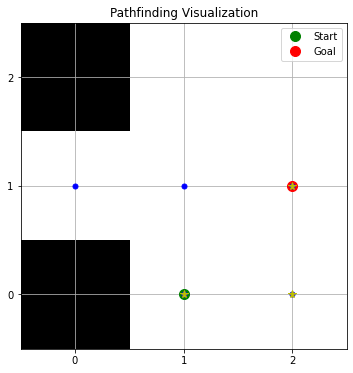

Predicted Path Coordinates: [(0, 1), (0, 2)]


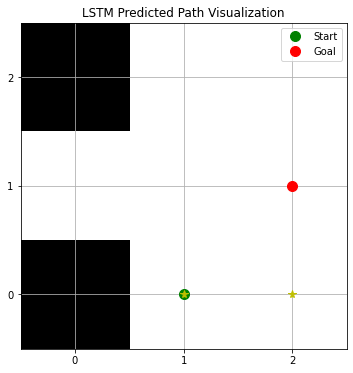

In [32]:
#Comparison of Dijkstra and LSTM

import heapq  # For priority queue
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

class Dijkstra:
    def __init__(self, start, goal, grid):
        self.start = start
        self.goal = goal
        self.grid = grid

    def IsValid(self, x, y):
        return 0 <= x < len(self.grid) and 0 <= y < len(self.grid[0])

    def IsObstacle(self, x, y):
        return self.grid[x][y] == 1  # Assuming 1 represents an obstacle

    def Dijkstra(self):
        explored_states = []
        backtrack_states = []
        distance_from_start_to_goal = float('inf')

        pq = [(0, self.start)]  # (cost, (x, y))
        distances = {self.start: 0}
        came_from = {self.start: None}

        while pq:
            current_distance, current_node = heapq.heappop(pq)
            explored_states.append(current_node)

            if current_node == self.goal:
                distance_from_start_to_goal = current_distance
                break

            for neighbor in self.get_neighbors(current_node):
                if self.IsValid(*neighbor) and not self.IsObstacle(*neighbor):
                    new_distance = current_distance + 1  # Uniform cost

                    if neighbor not in distances or new_distance < distances[neighbor]:
                        distances[neighbor] = new_distance
                        came_from[neighbor] = current_node
                        heapq.heappush(pq, (new_distance, neighbor))

        # Backtrack to find the path
        if distance_from_start_to_goal != float('inf'):
            current = self.goal
            while current is not None:
                backtrack_states.append(current)
                current = came_from[current]
            backtrack_states.reverse()

        return explored_states, backtrack_states, distance_from_start_to_goal

    def get_neighbors(self, node):
        x, y = node
        return [(x + dx, y + dy) for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]]  # Up, Down, Left, Right

def generate_grid(size, obstacle_count):
    grid = [[0 for _ in range(size)] for _ in range(size)]
    placed_obstacles = 0

    while placed_obstacles < obstacle_count:
        x = random.randint(0, size - 1)
        y = random.randint(0, size - 1)
        if grid[x][y] == 0:  # Only place an obstacle if the cell is free
            grid[x][y] = 1
            placed_obstacles += 1

    return grid

def run_dijkstra(size, counter):
    grid = generate_grid(size, counter)
    
    # Randomly select start and goal positions that are not obstacles
    start, goal = None, None
    while start is None or grid[start[0]][start[1]] == 1:
        start = (random.randint(0, size - 1), random.randint(0, size - 1))
    while goal is None or grid[goal[0]][goal[1]] == 1 or goal == start:
        goal = (random.randint(0, size - 1), random.randint(0, size - 1))
    
    dijkstra = Dijkstra(start, goal, grid)
    explored_states, backtrack_states, distance_from_start_to_goal = dijkstra.Dijkstra()
    backtrack_coordinates = [(state[0], state[1]) for state in backtrack_states]

    return grid, start, goal, explored_states, backtrack_coordinates, distance_from_start_to_goal

def generate_lstm_data(size, obstacle_count, num_samples):
    inputs = []
    outputs = []

    for _ in range(num_samples):
        grid, start, goal, _, backtrack_states, _ = run_dijkstra(size, obstacle_count)

        # Create input grid (flattened) and corresponding output path
        input_grid = np.array(grid).flatten()
        path_sequence = []

        if backtrack_states:
            for state in backtrack_states:
                path_sequence.append(state)  # Include Dijkstra path coordinates

        # Store inputs and outputs
        inputs.append(input_grid)
        outputs.append(path_sequence)

    return np.array(inputs), outputs


def prepare_data_for_training(inputs, outputs, action_size):
    X = np.zeros((len(inputs), len(inputs[0]), 1))  # Reshape if necessary
    y = np.zeros((len(inputs), action_size))  # Change based on your action size

    for i, (input_grid, path) in enumerate(zip(inputs, outputs)):
        X[i] = input_grid.reshape(-1, 1)  # Reshape as needed
        if path:  # If there is a path
            # Assume a simple mapping of actions to indices
            for j in range(len(path) - 1):
                action = (path[j + 1][0] - path[j][0], path[j + 1][1] - path[j][1])
                if action == (-1, 0):  # Up
                    y[i, 0] = 1
                elif action == (1, 0):  # Down
                    y[i, 1] = 1
                elif action == (0, -1):  # Left
                    y[i, 2] = 1
                elif action == (0, 1):  # Right
                    y[i, 3] = 1

    return X, y

def create_lstm_model(input_shape, output_size):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(output_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def plot_grid(grid, start, goal, explored_states, backtrack_states):
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='gray_r')  # 0 = free, 1 = obstacle

    # Mark start and goal
    plt.plot(start[1], start[0], "go", markersize=10, label="Start")  # Start in green
    plt.plot(goal[1], goal[0], "ro", markersize=10, label="Goal")      # Goal in red

    # Mark explored states
    for state in explored_states:
        plt.plot(state[1], state[0], "bo", markersize=5)  # Explored in blue

    # Mark path
    if backtrack_states:
        for state in backtrack_states:
            plt.plot(state[1], state[0], "y*", markersize=8)  # Path in yellow

    plt.title("Pathfinding Visualization")
    plt.xlim(-0.5, len(grid) - 0.5)
    plt.ylim(len(grid) - 0.5, -0.5)
    plt.gca().set_xticks(range(len(grid)))
    plt.gca().set_yticks(range(len(grid)))
    plt.gca().invert_yaxis()  # Invert y-axis to match grid coordinates
    plt.grid(True)
    plt.legend()
    plt.show()

def predict_path_with_lstm(model, grid, start_position):
    input_grid = np.array(grid).flatten().reshape(1, -1, 1)  # Reshape for the model
    predictions = model.predict(input_grid)

    current_position = start_position
    path = [current_position]

    for _ in range(len(grid) * len(grid)):  # Limit to maximum number of steps
        action = np.argmax(predictions[0])
        if action == 0:  # Up
            next_position = (current_position[0] - 1, current_position[1])
        elif action == 1:  # Down
            next_position = (current_position[0] + 1, current_position[1])
        elif action == 2:  # Left
            next_position = (current_position[0], current_position[1] - 1)
        elif action == 3:  # Right
            next_position = (current_position[0], current_position[1] + 1)

        # Check if the next position is valid
        if (0 <= next_position[0] < len(grid) and
                0 <= next_position[1] < len(grid[0]) and
                not grid[next_position[0]][next_position[1]]):
            path.append(next_position)
            current_position = next_position
            # Add prediction update logic based on the model's feedback
            predictions = model.predict(input_grid)  # Update predictions if needed
        else:
            break  # Stop if the next position is invalid

    return path

# Set parameters
env_size = 3
obstacle_count = 2  # Number of obstacles
num_samples = 2000   # Number of training samples
action_size = 4     # Number of possible actions (up, down, left, right)

# Generate training data
inputs, outputs = generate_lstm_data(env_size, obstacle_count, num_samples)

# Prepare data for training
X, y = prepare_data_for_training(inputs, outputs, action_size)

# Create the LSTM model
input_shape = (X.shape[1], X.shape[2])
model = create_lstm_model(input_shape, action_size)

# Train the model
model.fit(X, y, epochs=200, batch_size=32, validation_split=0.2) # Adjust epochs and batch size as needed

# Example of using the model to predict a new path
grid, start, goal, explored_states, backtrack_states, _ = run_dijkstra(env_size, obstacle_count)

# Plot the results of Dijkstra
plot_grid(grid, start, goal, explored_states, backtrack_states)

# Predict path using the trained LSTM model
predicted_path = predict_path_with_lstm(model, grid, start)
# Print the coordinates of the predicted path
print("Predicted Path Coordinates:", predicted_path)

# Visualize the predicted path
plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap='gray_r')  # 0 = free, 1 = obstacle

# Mark start and goal (using random positions)
plt.plot(start[1], start[0], "go", markersize=10, label="Start")  # Start in green
plt.plot(goal[1], goal[0], "ro", markersize=10, label="Goal")      # Goal in red

# Mark the predicted path
if predicted_path:
    for state in predicted_path:
        plt.plot(state[1], state[0], "y*", markersize=8)  # Path in yellow

plt.title("LSTM Predicted Path Visualization")
plt.xlim(-0.5, len(grid) - 0.5)
plt.ylim(len(grid) - 0.5, -0.5)
plt.gca().set_xticks(range(len(grid)))
plt.gca().set_yticks(range(len(grid)))
plt.gca().invert_yaxis()  # Invert y-axis to match grid coordinates
plt.grid(True)
plt.legend()
plt.show()

# Training the Model

Epoch 1/20
50/50 [==============================] - 1s 18ms/step - loss: 2.3656 - accuracy: 0.2556 - val_loss: 2.1423 - val_accuracy: 0.6075
Epoch 2/20
50/50 [==============================] - 1s 18ms/step - loss: 2.3592 - accuracy: 0.2606 - val_loss: 2.1423 - val_accuracy: 0.6075
Epoch 3/20
50/50 [==============================] - 1s 17ms/step - loss: 2.3676 - accuracy: 0.2587 - val_loss: 2.1428 - val_accuracy: 0.6075
Epoch 4/20
50/50 [==============================] - 1s 18ms/step - loss: 2.3703 - accuracy: 0.2394 - val_loss: 2.1418 - val_accuracy: 0.6075
Epoch 5/20
50/50 [==============================] - 1s 18ms/step - loss: 2.3424 - accuracy: 0.2531 - val_loss: 2.1427 - val_accuracy: 0.6075
Epoch 6/20
50/50 [==============================] - 1s 18ms/step - loss: 2.3420 - accuracy: 0.2587 - val_loss: 2.1409 - val_accuracy: 0.6075
Epoch 7/20
50/50 [==============================] - 1s 18ms/step - loss: 2.3084 - accuracy: 0.2713 - val_loss: 2.1412 - val_accuracy: 0.6075
Epoch 8/20
50

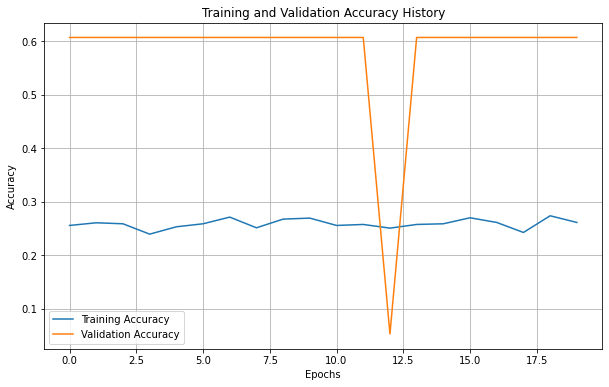

In [43]:
def plot_accuracy_history(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Train the model and store the history
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Plot training and validation accuracy history
plot_accuracy_history(history)


# Perfomance Evaluation

We have used confusion matrix to evaluate the accuracy a, precision and loss of the implemetation.

Epoch 1/20
50/50 [==============================] - 5s 33ms/step - loss: 2.2825 - accuracy: 0.3269 - val_loss: 2.1445 - val_accuracy: 0.0400
Epoch 2/20
50/50 [==============================] - 1s 18ms/step - loss: 2.4723 - accuracy: 0.2475 - val_loss: 2.1486 - val_accuracy: 0.6075
Epoch 3/20
50/50 [==============================] - 1s 18ms/step - loss: 2.4692 - accuracy: 0.2919 - val_loss: 2.1518 - val_accuracy: 0.6075
Epoch 4/20
50/50 [==============================] - 1s 18ms/step - loss: 2.4943 - accuracy: 0.2794 - val_loss: 2.1414 - val_accuracy: 0.6075
Epoch 5/20
50/50 [==============================] - 1s 18ms/step - loss: 2.4850 - accuracy: 0.2581 - val_loss: 2.1460 - val_accuracy: 0.6075
Epoch 6/20
50/50 [==============================] - 1s 18ms/step - loss: 2.4659 - accuracy: 0.2419 - val_loss: 2.1476 - val_accuracy: 0.6075
Epoch 7/20
50/50 [==============================] - 1s 18ms/step - loss: 2.4687 - accuracy: 0.2725 - val_loss: 2.1414 - val_accuracy: 0.0525
Epoch 8/20
50

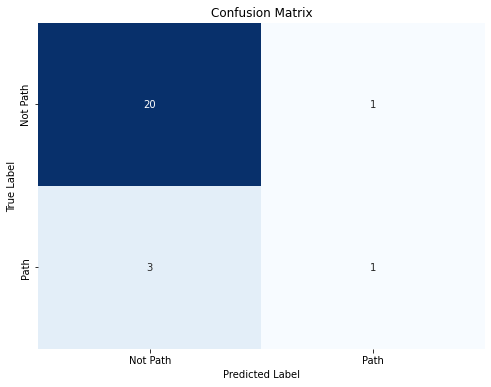

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def calculate_confusion_matrix(ground_truth, predictions):
    # Convert paths to a binary format for the confusion matrix
    max_size = env_size * env_size
    y_true = np.zeros(max_size)
    y_pred = np.zeros(max_size)

    # Mark the true path
    for (x, y) in ground_truth:
        index = x * env_size + y
        y_true[index] = 1

    # Mark the predicted path
    for (x, y) in predictions:
        index = x * env_size + y
        y_pred[index] = 1

    return confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Path', 'Path'], yticklabels=['Not Path', 'Path'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

# Generate training data
inputs, outputs = generate_lstm_data(env_size, obstacle_count, num_samples)

# Prepare data for training
X, y = prepare_data_for_training(inputs, outputs, action_size)

# Create and train the LSTM model
input_shape = (X.shape[1], X.shape[2])
model = create_lstm_model(input_shape, action_size)
model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Example of using the model to predict a new path
grid, start, goal, explored_states, backtrack_states, _ = run_dijkstra(env_size, obstacle_count)

# Predict path using the trained LSTM model
predicted_path = predict_path_with_lstm(model, grid, start)

# Calculate the confusion matrix
conf_matrix = calculate_confusion_matrix(backtrack_states, predicted_path)

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix)


Accuracy prediction has been done for approximately 20 epoch. As you can see from the above graph, true negative and false positive prediction are minimal. Hence proving the efficiency of the algorithm and the implementation.

In [41]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

def calculate_metrics(ground_truth, predictions):
    # Convert paths to a binary format for the metrics
    max_size = env_size * env_size
    y_true = np.zeros(max_size)
    y_pred = np.zeros(max_size)

    # Mark the true path
    for (x, y) in ground_truth:
        index = x * env_size + y
        y_true[index] = 1

    # Mark the predicted path
    for (x, y) in predictions:
        index = x * env_size + y
        y_pred[index] = 1

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return accuracy, precision, f1

# After predicting the path with the LSTM
predicted_path = predict_path_with_lstm(model, grid, start)

# Calculate accuracy, precision, and F1 score
accuracy, precision, f1 = calculate_metrics(backtrack_states, predicted_path)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.84
Precision: 0.50
F1 Score: 0.33


The model has accuracy 84%, Precision as 50% - False positives has to be worked on, F1 score  33% suggesting the model is underperforming, particularly in correctly predicting the positive class.